In [2]:
# Necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the survey data from Google Sheets
survey_data = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1qHgROQBNqbQVRUeVdFmH2exEsVsgM9Uof9DnYbOzpo4/export?format=csv",
    parse_dates=["Timestamp"],
    index_col=["Timestamp"],
)

# Set the points values for mapping
survey_resp = {"Most important": 5, "Fifth": 1, "Fourth": 2, "Third": 3, "Second": 4}

# Convert string responses to points
survey_data = survey_data.replace(survey_resp).replace(np.nan, 0)

# Rename the columns
for col in survey_data.columns:
    # Rename skills and remove brackets
    if "skills" in col:
        survey_data.rename(columns={col: col[88:-1]}, inplace=True)

    # Rename length of experience
    elif "long" in col:
        survey_data.rename(columns={col: "years_exp"}, inplace=True)

    # Rename
    elif "experience" in col:
        survey_data.rename(columns={col: "type_exp"}, inplace=True)

# Identify numerical columns
val_cols = [
    column for column in survey_data.columns if (survey_data[column].dtype == "float64")
]

# Replace 0 in years_exp and val_cols
survey_data.years_exp.replace(0, "0 years", inplace=True)
survey_data[val_cols].replace(0, np.nan).count(axis=1)

# Create list for labeling
years_exp_list = ["0 years", "0-3 years", "3-5 years", "5-10 years", "10+ years"]

# Calculate total scores
totals = survey_data[val_cols].mean().sort_values()

# Identify top and bottom 5 overall
bot_5_overall = totals[:5].sort_values(ascending=False)
top_5_overall = totals[-5:].sort_values(ascending=False)

# Split surveys based on valid responses
survey_data["valid"] = (survey_data[val_cols].sum(axis=1) <= 15) & (
    survey_data[val_cols].replace(0, np.nan).count(axis=1) == 5
)

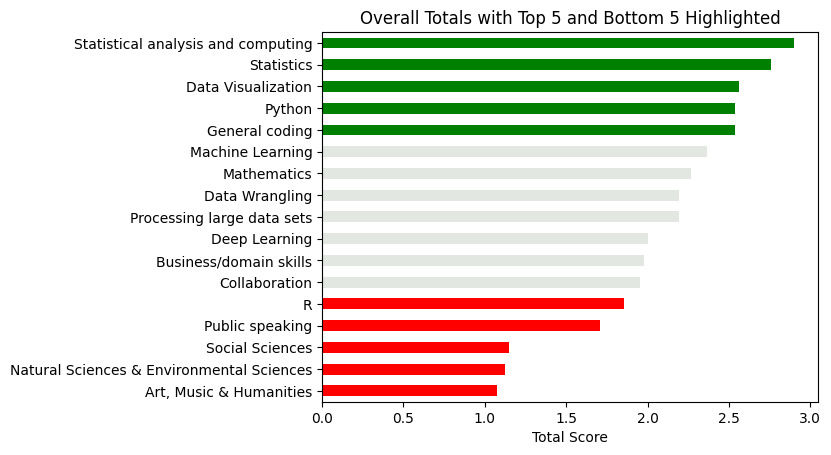

In [4]:
# Plot overall totals with colors for most and least results
ax = totals.plot.barh()  # Set a default color for all bars

for i, val in enumerate(totals):
    if totals.index[i] in top_5_overall.index:
        ax.patches[i].set_facecolor("green")
    elif totals.index[i] in bot_5_overall.index:
        ax.patches[i].set_facecolor("red")
    else:
        ax.patches[i].set_facecolor("#23421320")

# Add labels and legend
plt.xlabel("Total Score")
plt.title("Overall Totals with Top 5 and Bottom 5 Highlighted")

# Show the plot
plt.show()

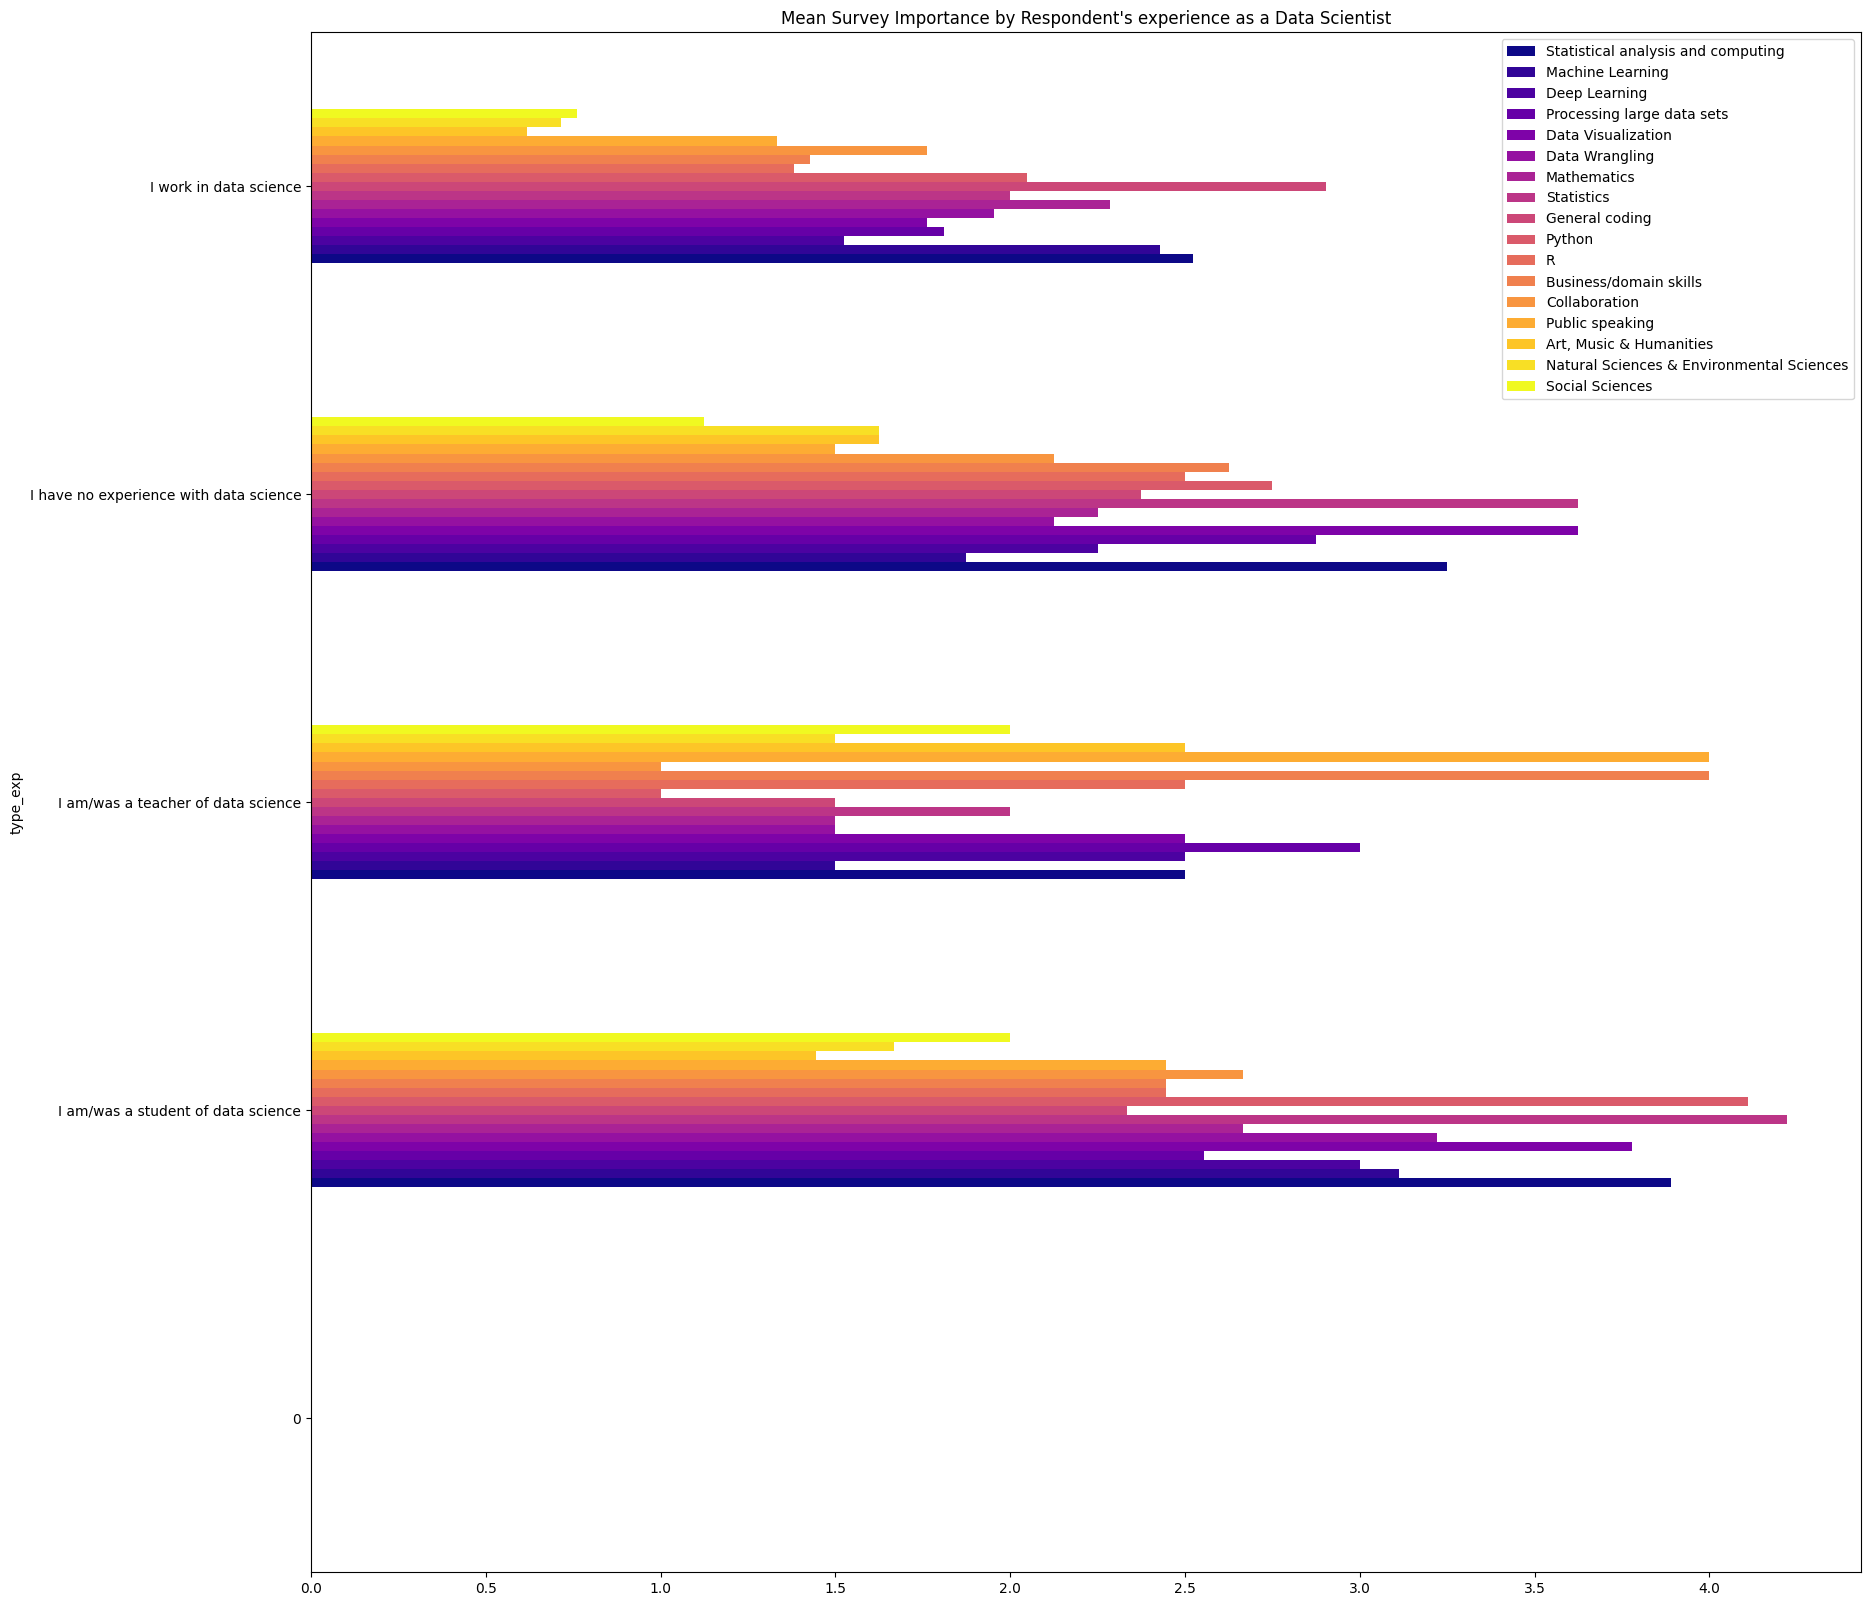

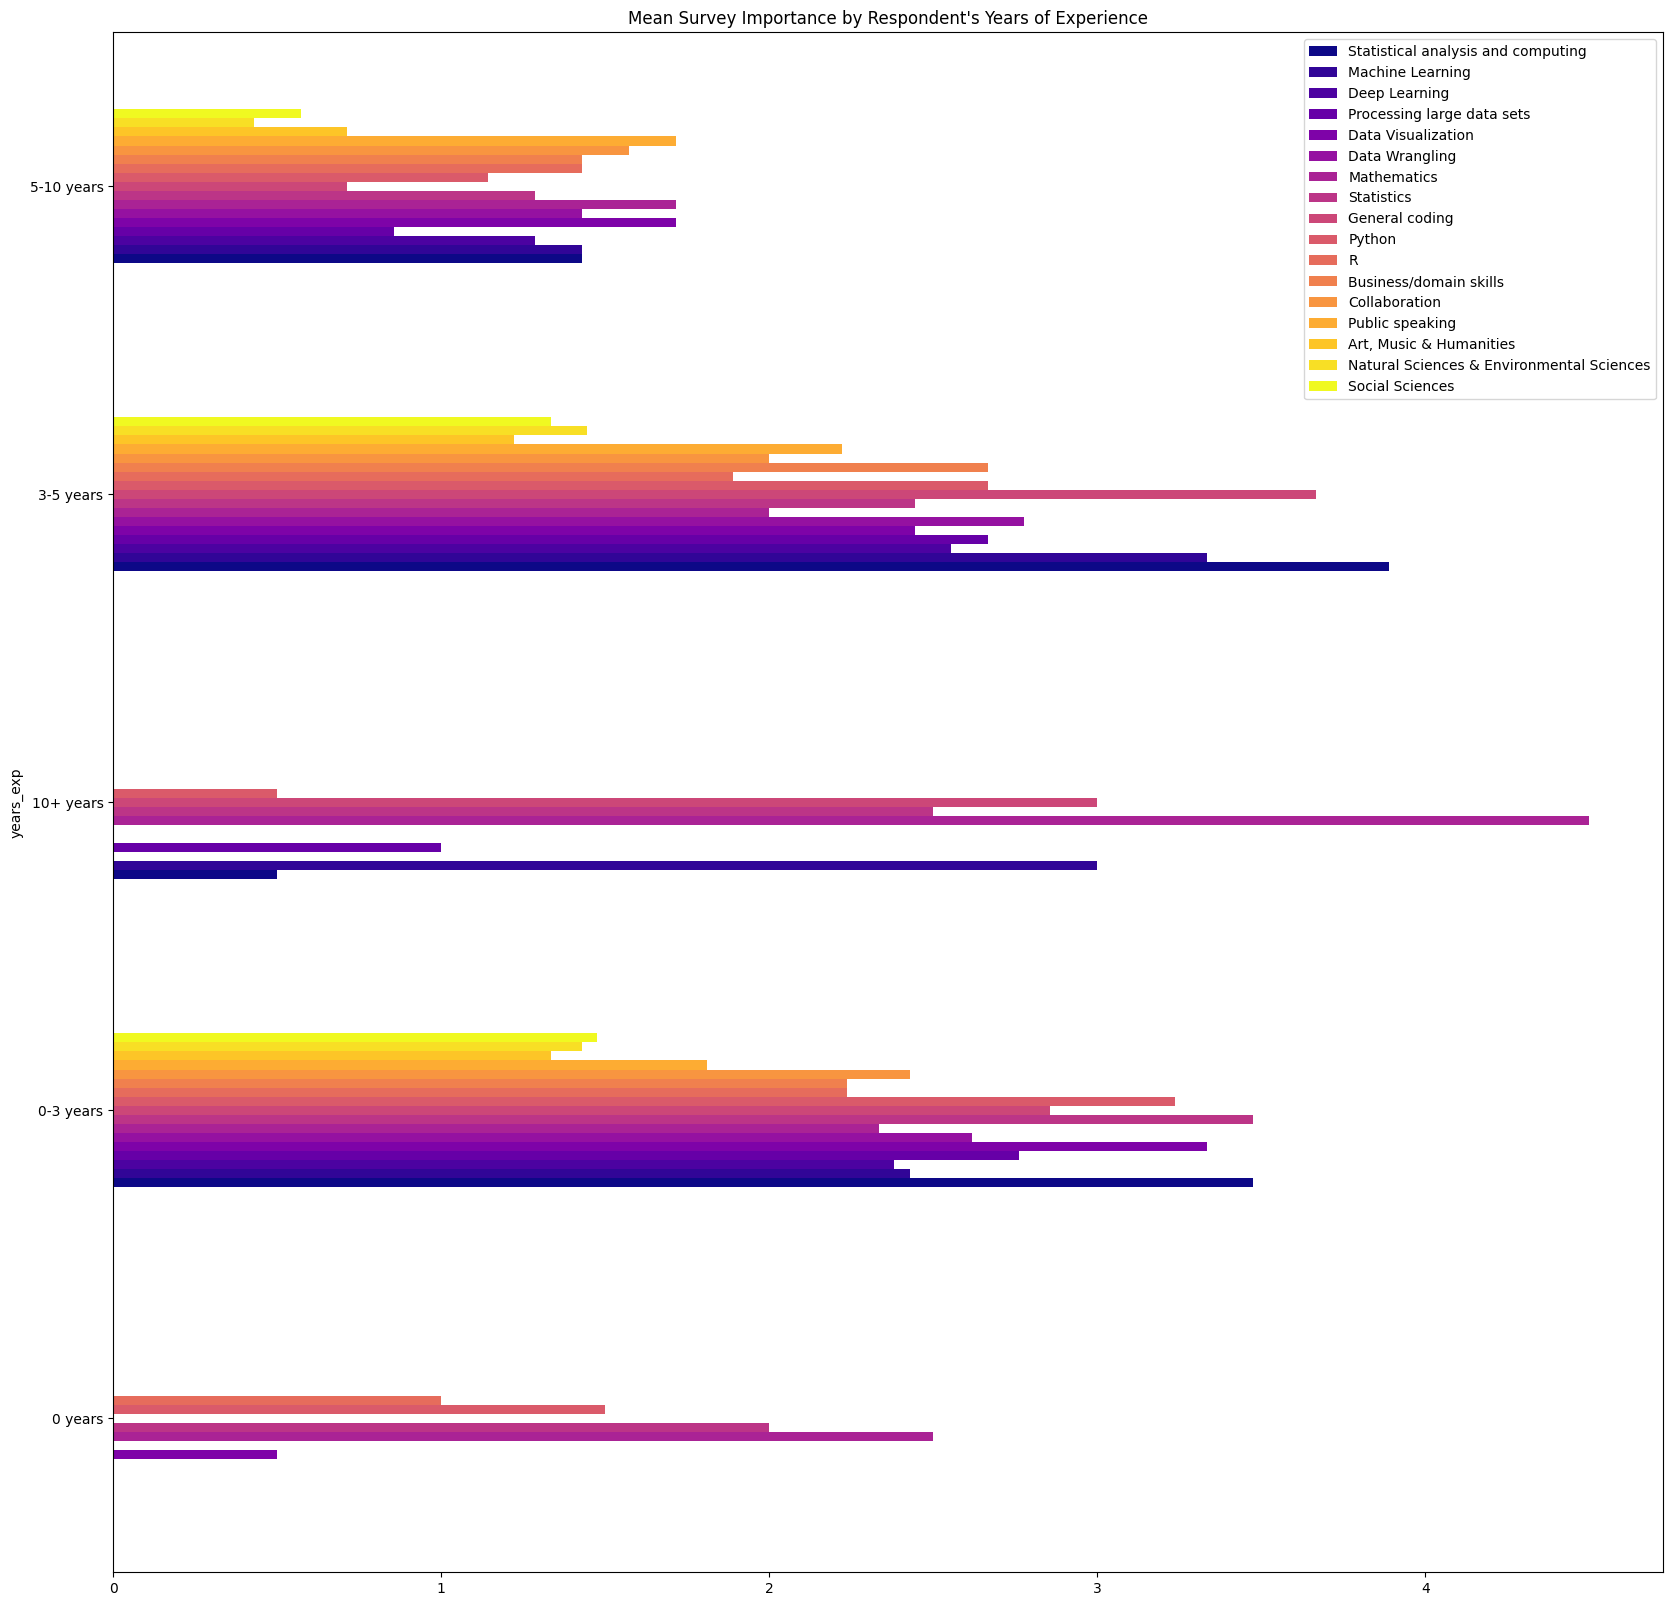

In [18]:
## Analyzing by experience group:
survey_data.groupby("type_exp")[val_cols].mean().plot.barh(
    figsize=(20, 20), cmap='plasma'
)  
plt.title("Mean Survey Importance by Respondent's experience as a Data Scientist")

## Analylzing by years group:
survey_data.groupby("years_exp")[val_cols].mean().plot.barh(
    figsize=(20, 20), cmap='plasma'
)
plt.title("Mean Survey Importance by Respondent's Years of Experience")

plt.show()
### Note that we're using mean here to account for the difference in number of responses between the different groups.

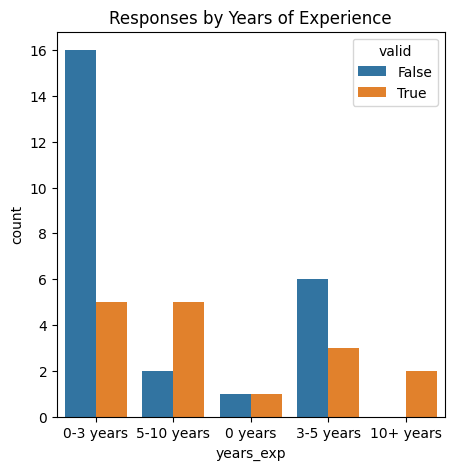

In [15]:
# Plot the distribution of valid / invalid surveys by years_exp
fig = plt.subplots(figsize=(5, 5))
sns.countplot(data=survey_data, x="years_exp", hue="valid")
plt.title('Responses by Years of Experience')
plt.show()

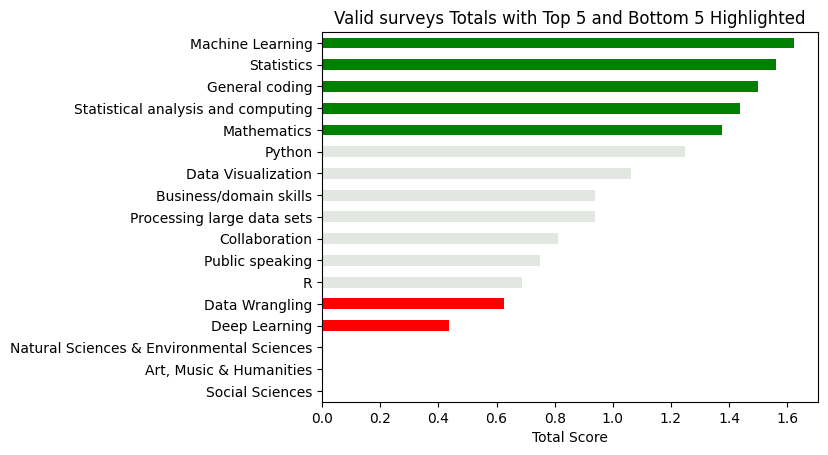

In [7]:
# Calculate total valid scores
val_totals = survey_data[survey_data.valid == True][val_cols].mean().sort_values()

# Identify top and bottom 5 overall
bot_5_val = val_totals[:5].sort_values(ascending=False)
top_5_val = val_totals[-5:].sort_values(ascending=False)

ax = val_totals.plot.barh()

# Set color mapping based on high / low valid scores
for i, val in enumerate(val_totals):
    if val_totals.index[i] in top_5_val.index:
        ax.patches[i].set_facecolor("green")
    elif val_totals.index[i] in bot_5_val.index:
        ax.patches[i].set_facecolor("red")
    else:
        ax.patches[i].set_facecolor("#23421320")

# Add labels and legend
plt.xlabel("Total Score")
plt.title("Valid surveys Totals with Top 5 and Bottom 5 Highlighted")

# Show the plot
plt.show()

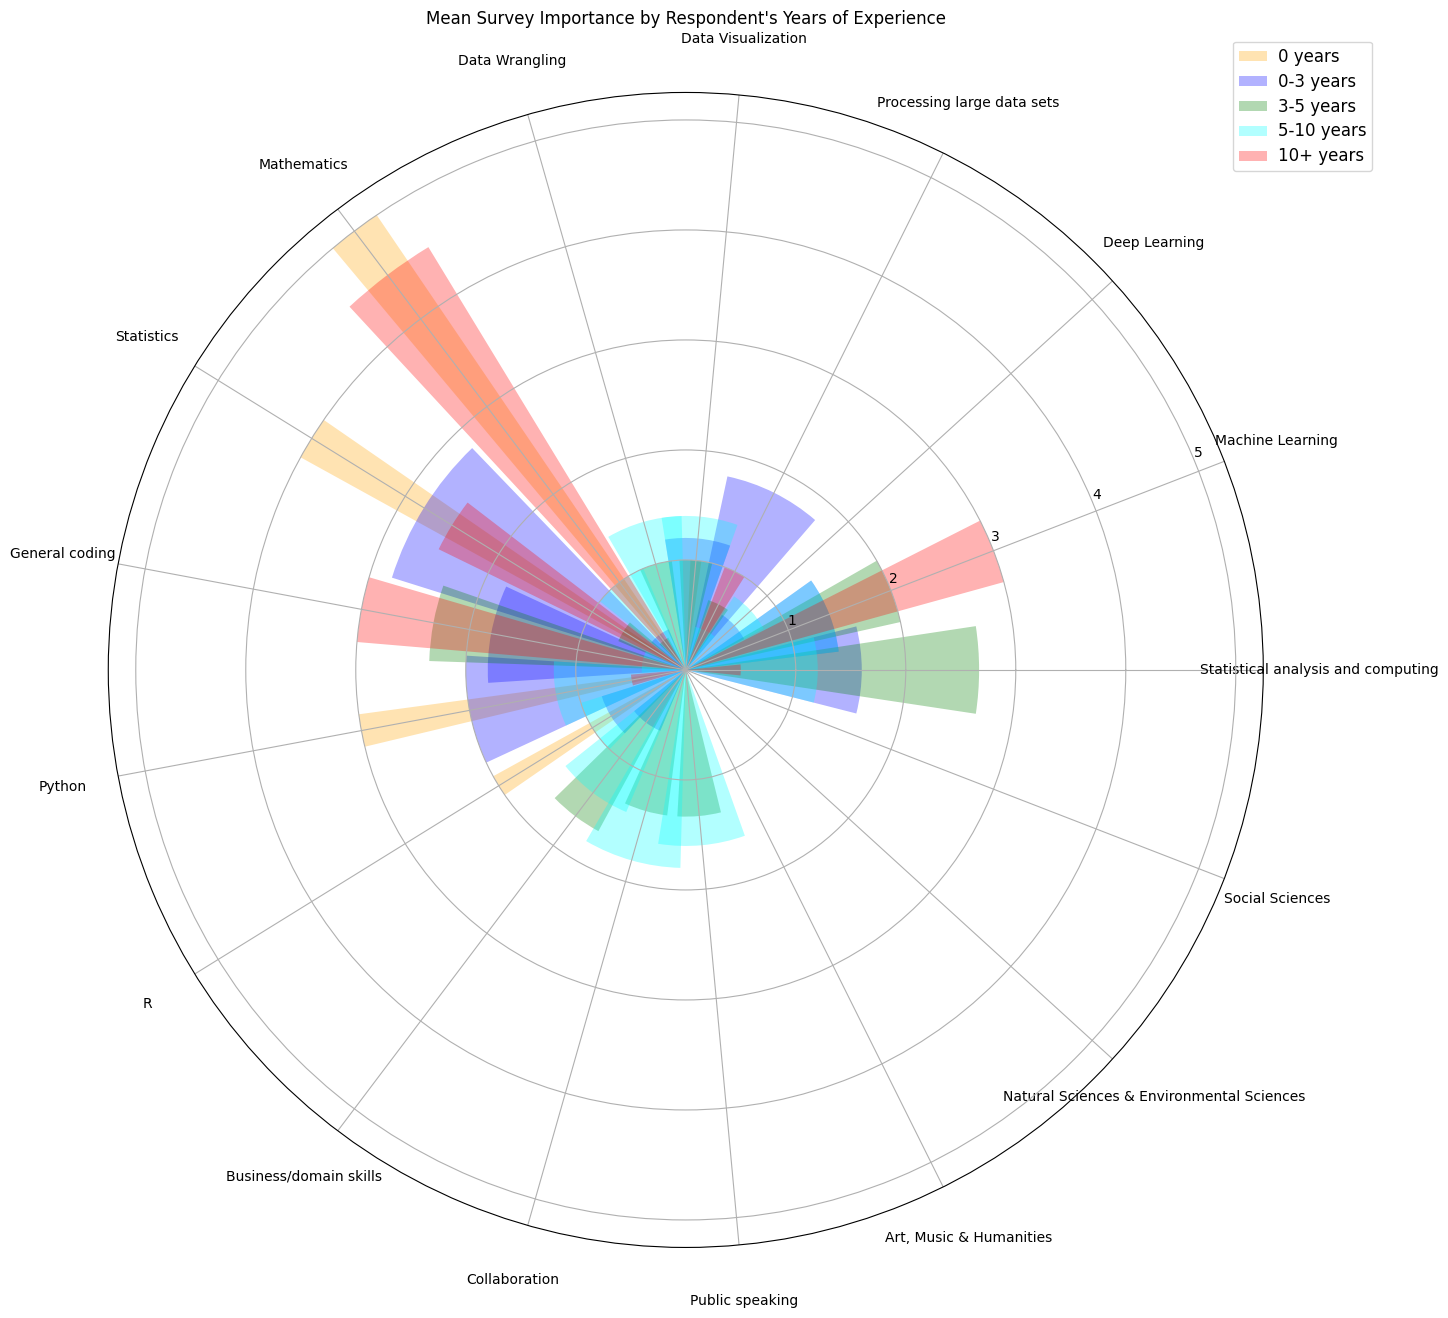

In [13]:
color_list = ["orange", "blue", "green", "cyan", "red"]

#### Polar map to compare responses by years_exp
fig = plt.figure(figsize=(15, 15))

# Create dict of years_exp. 1st element in dict is mean of skill, 2nd element is count of skill
radii_dict = {
    ind: [
        survey_data[(survey_data.valid == True) & (survey_data.years_exp == exp[0])][
            val_cols
        ].mean(),
        survey_data[(survey_data.valid == True) & (survey_data.years_exp == exp[0])][
            val_cols
        ].count(),
        exp[1],
    ]
    for ind, exp in enumerate(zip(years_exp_list, color_list))
}

# Set plot as Polar projection
ax = fig.add_subplot(projection="polar")

# Set theta angles
angles = [n / float(len(val_cols)) * 2 * np.pi for n in range(len(val_cols))]
angles += angles[:1]

# Set baseline bar width
width = np.pi / len(val_cols)

# Build axes bars. Length is mean of skill by years_exp, width is count of skill by years_exp
for rad in radii_dict:
    ax.bar(
        angles[:-1],
        radii_dict[rad][0],
        width=radii_dict[rad][1] / 10,
        bottom=0.0,
        color=radii_dict[rad][2],
        alpha=0.3,
    )

# Labeling all the ticks #### in progress, still needs work
plt.setp(
    ax.legend(
        labels=years_exp_list, loc="best", bbox_to_anchor=(0.6, 0.55, 0.5, 0.5)
    ).get_texts(),
    fontsize=12,
)

# Set X-tick labels
plt.xticks(angles[:-1], val_cols)
ax.tick_params(axis="x", which="major", pad=30)
ax.set_title("Mean Survey Importance by Respondent's Years of Experience")
# ax.set_xticklabels(labels=val_cols)


# Output the plot
plt.show()

In [9]:
np.random.rand()

0.17686213645772264